In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_samples, silhouette_score
import mlxtend

In [17]:
#dataset

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

# Question 1

In [18]:
#one-hot-encoding 

on_hot = TransactionEncoder()
on_hot_ary=on_hot.fit(dataset).transform(dataset) 
df=pd.DataFrame(on_hot_ary, columns=on_hot.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Dress       5 non-null      bool 
 1   Earrings    5 non-null      bool 
 2   Hat         5 non-null      bool 
 3   Heels       5 non-null      bool 
 4   Necklace    5 non-null      bool 
 5   Pants       5 non-null      bool 
 6   Sandals     5 non-null      bool 
 7   Scarf       5 non-null      bool 
 8   Shirt       5 non-null      bool 
 9   Skirt       5 non-null      bool 
 10  Sneakers    5 non-null      bool 
 11  Sunglasses  5 non-null      bool 
dtypes: bool(12)
memory usage: 188.0 bytes


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

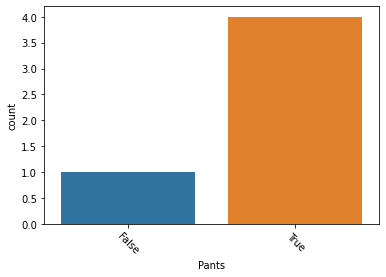

In [29]:
sns.countplot(x='Pants', data=df)
plt.xticks(rotation=-45)

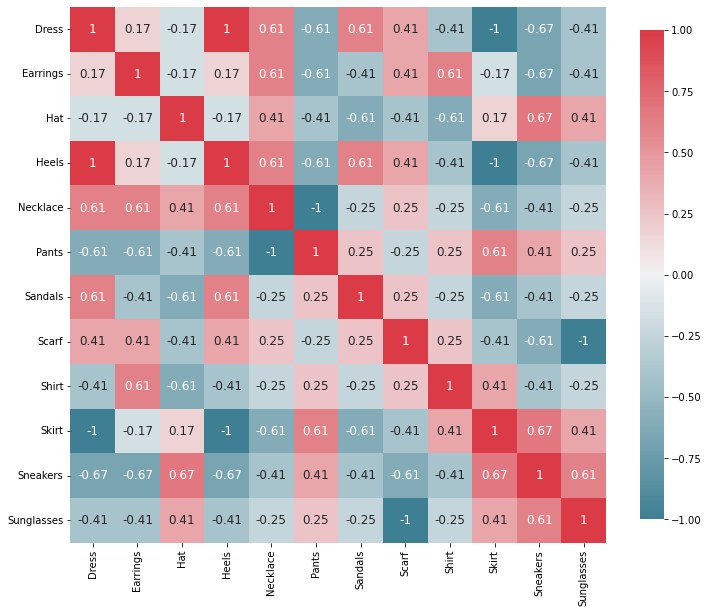

In [30]:
def plot_correlation_map( df ):

    df.corr()

s , ax = plt.subplots( figsize =( 12 , 10 ) )

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

s = sns.heatmap(

        df.corr(), 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )


In [31]:
#Apriori algorithm

from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [32]:
# associate itemsets with confidence over 70%.

from mlxtend.frequent_patterns import association_rules 
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [33]:
# associate itemsets with lift equal 1

rules_lift=association_rules(frequent_itemsets,metric="lift",min_threshold=1) 
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6


C:\Users\hp\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\hp\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


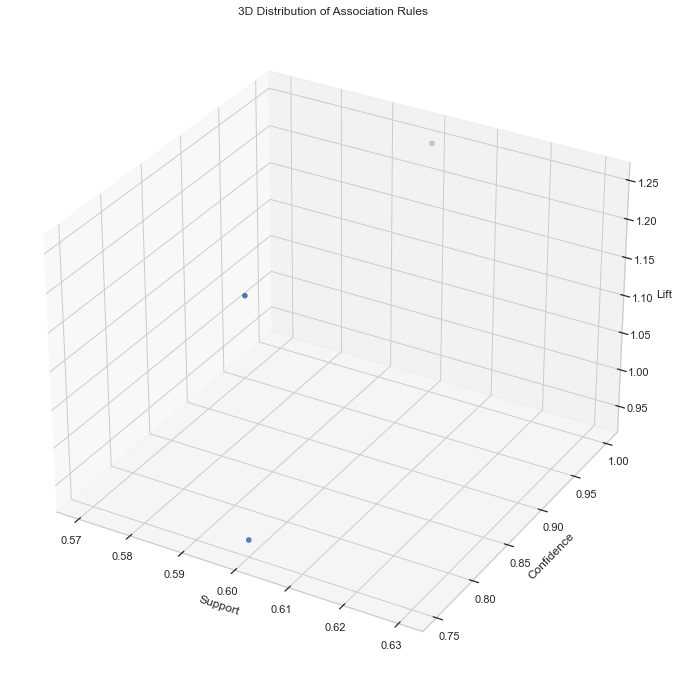

In [35]:
#Association rules plot

sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\hp\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


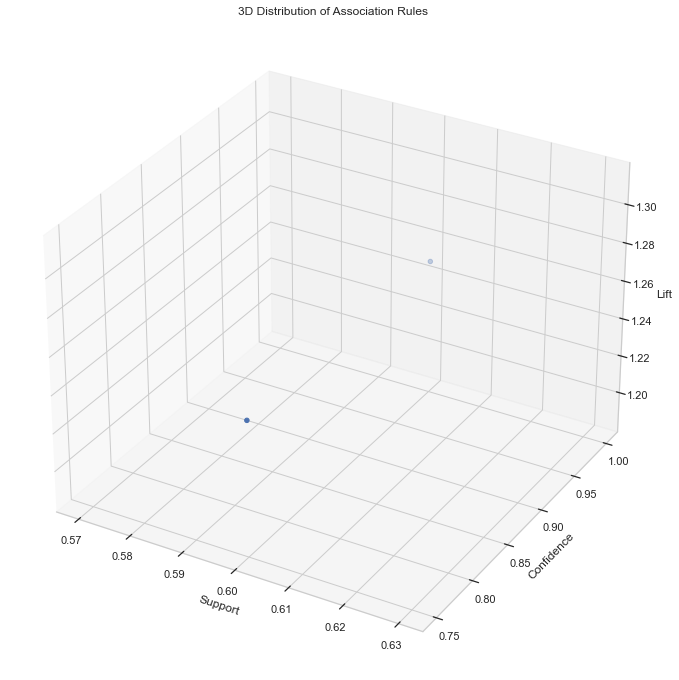

In [36]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules_lift['support']
y = rules_lift['confidence']
z = rules_lift['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

So we can notice that a customer who buys a skirt has more probability to buy a pants than another article. So it would be more interesting to combine the 2 for a future promotion.

In [37]:
fre_itemsets=apriori(df, min_support=0.4, use_colnames=True)
fre_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Dress, Heels)"
9,0.4,"(Dress, Scarf)"


In [38]:
rule=association_rules(fre_itemsets,metric="lift",min_threshold=2)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Dress),(Heels),0.4,0.4,0.4,1.0,2.5,0.24,inf
1,(Heels),(Dress),0.4,0.4,0.4,1.0,2.5,0.24,inf
2,"(Dress, Scarf)",(Heels),0.4,0.4,0.4,1.0,2.5,0.24,inf
3,"(Scarf, Heels)",(Dress),0.4,0.4,0.4,1.0,2.5,0.24,inf
4,(Dress),"(Scarf, Heels)",0.4,0.4,0.4,1.0,2.5,0.24,inf
5,(Heels),"(Dress, Scarf)",0.4,0.4,0.4,1.0,2.5,0.24,inf
6,"(Hat, Pants)",(Sneakers),0.4,0.4,0.4,1.0,2.5,0.24,inf
7,(Sneakers),"(Hat, Pants)",0.4,0.4,0.4,1.0,2.5,0.24,inf
8,"(Skirt, Hat)",(Sneakers),0.4,0.4,0.4,1.0,2.5,0.24,inf
9,(Sneakers),"(Skirt, Hat)",0.4,0.4,0.4,1.0,2.5,0.24,inf


Dress, Scarf,Heels

Hat, Pants,Sneakers

Hat, Skirt,Sneakers

Hat, Pants,Sneakers, Skirt

All these combinations give us a lift of 2.5, so we can combine these items

to facilitate their sale or apply a promotion

# Question 2

In [42]:
 #With a big data set "Market_Basket_Optimisation"
    
data = pd.read_csv("Market_Basket_Optimisation.csv", encoding="ISO8859-1", header=None)
df1 = data.copy() #data copy
df1.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
l=[]
for i in range(1,7501):
    l.append([str(df1.values[i,j]) for j in range(0,20)])
l[20]

['rice',
 'sparkling water',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [46]:
te=TransactionEncoder()
te_ary=te.fit(l).transform(l)    #Apply one-hot-encoding on our dataset
market=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
market.head(10)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
market.drop(labels='nan',axis=1, inplace=True)
market

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
itemsets=apriori(market, min_support=0.007, use_colnames=True)
itemsets

,support,itemsets
0,0.020267,(almonds)
1,0.008800,(antioxydant juice)
2,0.033200,(avocado)
3,0.008667,(bacon)
4,0.010800,(barbecue sauce)
...,...,...
423,0.010267,"(olive oil, mineral water, spaghetti)"
424,0.011467,"(pancakes, mineral water, spaghetti)"
425,0.008533,"(shrimp, spaghetti, mineral water)"
426,0.007467,"(spaghetti, mineral water, soup)"


In [50]:
# associate itemsets with lift equal 3 or plus

rule_lift=association_rules(itemsets,metric="lift",min_threshold=3) 
rule_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,0.011139,1.135402
1,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841
2,(whole wheat pasta),(olive oil),0.029467,0.065733,0.008000,0.271493,4.130221,0.006063,1.282441
3,(olive oil),(whole wheat pasta),0.065733,0.029467,0.008000,0.121704,4.130221,0.006063,1.105018
4,"(spaghetti, frozen vegetables)",(ground beef),0.027867,0.098267,0.008667,0.311005,3.164906,0.005928,1.308766
5,(ground beef),"(spaghetti, frozen vegetables)",0.098267,0.027867,0.008667,0.088195,3.164906,0.005928,1.066164
6,"(shrimp, mineral water)",(frozen vegetables),0.023467,0.095333,0.007200,0.306818,3.218373,0.004963,1.305093
7,(frozen vegetables),"(shrimp, mineral water)",0.095333,0.023467,0.007200,0.075524,3.218373,0.004963,1.056311
8,"(milk, mineral water)",(soup),0.048000,0.050533,0.008533,0.177778,3.518030,0.006108,1.154757
9,(soup),"(milk, mineral water)",0.050533,0.048000,0.008533,0.168865,3.518030,0.006108,1.145422


(herb & pepper) (ground beef)

(olive oil) (whole wheat pasta)

(spaghetti, frozen vegetables) (ground beef)

(shrimp, mineral water) (frozen vegetables)

(milk, mineral water) (soup)

(spaghetti, milk) (olive oil)

These associations show us that a customer who buys one of the products or a group of products on the left

should be offered the products on the right.

These groups are interchangeable